In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2
import os
import random
import pandas as pd

# Def

In [2]:
# blue
def mergeIm(img1, img2) :

    img1 = img1[:,:,::-1]
    img2 = img2[:,:,::-1]

    y1,x1,_ = img1.shape
    y2,x2,_ = img2.shape
    
    X = x1+x2-int((x1+x2)/10)
    Y = max(y1,y2)
    b = np.zeros([Y,X,3],dtype = np.uint8)
    b[:,:]=[255,255,255]
    for i in range(X):
        for j in range(Y):
            if i < x1 and j< y1 :
                x = img1[j][i][0]
                if x <= 230 :
                    b[j,i] = img1[j][i]
                
            if i > X-x2  and j< y2:
                ii = x2-(X-i)
                x = img2[j][ii][0]
                if x <= 230 :
                    iii = X-(x2-ii)
                    b[j,iii] = img2[j][ii]
    
    #b = Image.fromarray(b)
    return(b,y1,x1)


In [3]:
# blue รวมแบบตัวไม่เท่ากัน
def mergeIm2(img1, img2) :

    img1 = img1[:,:,::-1]
    img2 = img2[:,:,::-1]

    y1,x1,_ = img1.shape
    y2,x2,_ = img2.shape
    
    X = x1+x2-int((x1+x2)/10)
    dy = y2-y1
    Y = max(y1,y2)
    b = np.zeros([Y,X,3],dtype = np.uint8)
    b[:,:]=[255,255,255]
    for i in range(X):
        for j in range(Y):
            if i < x1 and j< y1 :
                x = img1[j][i][0]
                if x <= 230 :
                    b[j+dy,i] = img1[j][i] #ตัวหลังยาวกว่า
                
            if i > X-x2  and j< y2:
                ii = x2-(X-i)
                x = img2[j][ii][0]
                if x <= 230 :
                    iii = X-(x2-ii)
                    b[j,iii] = img2[j][ii]
    
    #b = Image.fromarray(b)
    return(b,y1,x1)


In [4]:
# blue รวมแบบตัวไม่เท่ากัน
def mergeIm3(img1, img2) :

    img1 = img1[:,:,::-1]
    img2 = img2[:,:,::-1]

    y1,x1,_ = img1.shape
    y2,x2,_ = img2.shape
    
    X = x1+x2-int((x1+x2)/10)
    dy = y1-y2
    Y = max(y1,y2)
    b = np.zeros([Y,X,3],dtype = np.uint8)
    b[:,:]=[255,255,255]
    for i in range(X):
        for j in range(Y):
            if i < x1 and j< y1 :
                x = img1[j][i][0]
                if x <= 230 :
                    b[j,i] = img1[j][i] 
                
            if i > X-x2  and j< y2:
                ii = x2-(X-i)
                x = img2[j][ii][0]
                if x <= 230 :
                    iii = X-(x2-ii)
                    b[j+dy,iii] = img2[j][ii] #ตัวหน้ายาวกว่า
    
    #b = Image.fromarray(b)
    return(b,y1,x1)


In [5]:
def add_border(input_image, output_image, color=0):
    img = input_image
    x,y = img.size

    if x>y :
        border_x = int(x/10)
        border_y = int(((x+2*border_x)-y)/2)
    elif y>x :
        border_y = int(y/10)
        border_x = int(((y+2*border_y)-x)/2)
    else:
        border_x = int(x/10)
        border_y = int(y/10)
     
    border = (border_y, border_x, border_y, border_x)
    #img = Image.fromarray(img)
   
    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
        
        bimg = bimg.resize((50, 50))
    else:
        raise runtimeerror('border is not an integer or tuple!')

    bimg.save(output_image)

In [6]:
def cropIm(out_path):
    image = cv2.imread(out_path)

    # convert to RGB cv2.COLOR_BGR2GRAY
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    # create a binary thresholded image
    _, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

    # find the contours from the thresholded image
    _,contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    c = max(contours,key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    
    cropped_image = image[y:y+h,x:x+w]
    ######
    #cropped_image.save(output_image)
    #####
    return(cropped_image)

In [7]:
# ตัดขอบแบบตัวแยกกัน
def cropIm2(out_path):
    image = cv2.imread(out_path)
    x,y,_ = image.shape

    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0

    for i in range(x):
        for j in range(y):    
            if 255-image[i][j][0] > 10:
                x1 = i
                break
        if x1 != 0:
            break

    for i in range(x):
        for j in range(y):    
            if 255-image[x-1-i][j][0] > 10:
                x2 = x-1-i
                break
        if x2 != 0:
            break

    for j in range(y):
        for i in range(x):    
            if 255-image[i][j][0] > 10:
                y1 = j
                break
        if y1 != 0:
            break

    for j in range(y):
        for i in range(x):    
            if 255-image[i][y-1-j][0] > 10:
                y2 = y-1-j
                break
        if y2 != 0:
            break

    cropped_image = image[x1:x2,y1:y2]
        
    return(cropped_image)

# work

In [9]:
inPath = "C:/Users/HOME/Desktop/Blue/train/"

outPath1 = "C:/Users/HOME/Desktop/TwoClasses/database/Train/OneChar/"
outPath2 = "C:/Users/HOME/Desktop/TwoClasses/database/Validation/OneChar/"
outPath3 = "C:/Users/HOME/Desktop/TwoClasses/database/Test/"


for a in os.listdir(inPath):
    in_path1 = inPath + str(a) + '/' 
    count1 = 0
    count2 = 0
    count3 = 0
    count = 0
    if a != '001':
        break
    
    for j in os.listdir(in_path1):
        in_path = in_path1 + '/' + str(j)
        
        image = cv2.imread(in_path)
        
        
        if count%500 == 0:
            if count3 > 4:
                www=0
            else:
                out_path = outPath3 + str(j)
                cv2.imwrite(out_path, image)

                count += 1
                count3 += 1
        
        
        elif count%4 == 0:
            if count2 > 392:
                www=0
            else:
                out_path = outPath2 + str(j)
                cv2.imwrite(out_path, image)

                count += 1
                count2 += 1
                
            
        else:
            if count1 > 1404:
                www=0
            else:
                out_path = outPath1 + str(j)
                cv2.imwrite(out_path, image)

                count1 += 1
                count += 1
           
            
            

In [16]:

in_Path = "C:/Users/HOME/Desktop/TwoClasses/database/Validation/OneChar/" + str(a)
bw = cv2.imread(in_Path,cv2.IMREAD_GRAYSCALE)

dim = (28, 28)

bw = cv2.resize(bw, dim, interpolation = cv2.INTER_AREA)     # resize image
out = "C:/Users/HOME/Desktop/test/validation/one/"+ str(a)
#cv2.imwrite(out, bw)
    


end


In [39]:
list001 = [["020",74], ["021",162], ["023",229], ["025",138], ["026",70], ["027",131], ["028",71], ["030",104], ["033",137], ["035",177], ["037",100], ["040",206], ["041",181], ["043",142], ["048",256], ["055",452], ["056",190]]

for l in list001:

    firstChar = "007"
    secondChar = l[0]
    number = l[1]

    inPath1 = "C:/Users/HOME/Desktop/Blue/train/"+ firstChar
    inPath2 = "C:/Users/HOME/Desktop/Blue/train/"+ secondChar

    outPath1 = "C:/Users/HOME/Desktop/TwoClasses/database/Train/TwoChar"
    outPath2 = "C:/Users/HOME/Desktop/TwoClasses/database/Validation/TwoChar"
    outPath3 = "C:/Users/HOME/Desktop/TwoClasses/database/Test"

    pair = firstChar + "_" + secondChar + "_"
    count = 0

    for i in os.listdir(inPath1):
        for j in os.listdir(inPath2):

            in_path1 = inPath1 + '/' + str(i)
            in_path2 = inPath2 + '/' + str(j)

            crop1 = cropIm(in_path1)
            crop2 = cropIm(in_path2)


            img1 = crop1
            img2 = crop2


            if abs(img1.shape[0]-img2.shape[0]) > 1 :
                continue


            newIm,_,_ = mergeIm(img1, img2)
            newIm = newIm[:,:,::-1]
            newIm = Image.fromarray(newIm)


            if count%200 == 0 :
                out_path = outPath3 + '/char_' + pair + str(count) + '.png'
            elif count%4 == 0 :
                out_path = outPath2 + '/char_' + pair + str(count) + '.png'
            else :
                out_path = outPath1 + '/char_' + pair + str(count) + '.png'

            add_border(newIm, output_image = out_path, color='white' )
            count += 1

            if count == number*10 :
                break
        if count == number*10 :
            print(pair,"\ndone\n",count)
            break




007_020_ 
done
 740
007_021_ 
done
 1620
007_023_ 
done
 2290
007_025_ 
done
 1380
007_026_ 
done
 700
007_027_ 
done
 1310
007_028_ 
done
 710
007_030_ 
done
 1040
007_033_ 
done
 1370
007_035_ 
done
 1770
007_037_ 
done
 1000
007_040_ 
done
 2060
007_041_ 
done
 1810
007_043_ 
done
 1420
007_048_ 
done
 2560
007_055_ 
done
 4520
007_056_ 
done
 1900


In [17]:
data = pd.read_excel('Reoutput.xlsx', engine='openpyxl')
data.iloc[0]['ก']

139

In [18]:
names = data.columns.tolist()
columnList = ['ก','ข','ฃ','ค','ฅ','ฆ','ง','จ','ฉ','ช',
              'ซ','ฌ','ญ','ฎ','ฏ','ฐ','ฑ','ฒ','ณ','ด',
              'ต','ถ','ท','ธ','น','บ','ป','ผ','ฝ','พ','ฟ',
              'ภ','ม','ย','ร','ล','ว','ศ','ษ','ส','ห','ฬ','อ',
              'ฮ','า','เ','แ','ฤ','ฦ','ๅ','ๆ','ฯ']

list2 = ['โ','ไ','ใ']
dict2 = {'โ':'059' , 'ไ':'058' , 'ใ':'057'}

columnDict = {'ก':'001' , 'ข':'002' , 'ฃ':'003' , 'ค':'004' , 'ฅ':'005' ,
              'ฆ':'006' , 'ง':'007' , 'จ':'008' , 'ฉ':'009' , 'ช':'010' ,
              'ซ':'011' , 'ฌ':'012' , 'ญ':'013' , 'ฎ':'014' , 'ฏ':'015' ,
              'ฐ':'016' , 'ฑ':'017' , 'ฒ':'018' , 'ณ':'019' , 'ด':'020',
              'ต':'021' , 'ถ':'022' , 'ท':'023' , 'ธ':'024' , 'น':'025' ,
              'บ':'026' , 'ป':'027' , 'ผ':'028' , 'ฝ':'029' , 'พ':'030' , 
              'ฟ':'031' , 'ภ':'032' , 'ม':'033' , 'ย':'034' , 'ร':'035' ,
              'ล':'036' , 'ว':'037' , 'ศ':'038' , 'ษ':'039' , 'ส':'040' ,
              'ห':'041' , 'ฬ':'042' , 'อ':'043' , 'ฮ':'044' , 'า':'048' ,
              'เ':'055' , 'แ':'056' , 'ฤ':'060' , 'ฦ':'061' , 'ๅ':'062' ,
              'ๆ':'068' , 'ฯ':'069'}
columnDict['ก']

'001'

In [20]:
outPath1 = "C:/Users/HOME/Desktop/TwoClasses/database/Train/TwoChar"
outPath2 = "C:/Users/HOME/Desktop/TwoClasses/database/Validation/TwoChar"
outPath3 = "C:/Users/HOME/Desktop/TwoClasses/database/Test"

139

In [101]:

row = 3
firstChar = "00" + str(row+1)
inPath1 = "C:/Users/HOME/Desktop/Blue/train/"+ firstChar

for l in columnList:
    if data.iloc[row][l] < 100:
        continue
        
    number = data.iloc[row][l]
    
    secondChar = columnDict[l]
    inPath2 = "C:/Users/HOME/Desktop/Blue/train/"+ secondChar
    
    pair = firstChar + "_" + secondChar + "_"
    count = 0

    for i in os.listdir(inPath1):
        for j in os.listdir(inPath2):

            in_path1 = inPath1 + '/' + str(i)
            in_path2 = inPath2 + '/' + str(j)

            crop1 = cropIm(in_path1)
            crop2 = cropIm(in_path2)


            img1 = crop1
            img2 = crop2


            if abs(img1.shape[0]-img2.shape[0]) > 3 :
                continue


            newIm,_,_ = mergeIm(img1, img2)
            newIm = newIm[:,:,::-1]
            newIm = Image.fromarray(newIm)


            if count%200 == 0 :
                out_path = outPath3 + '/char_' + pair + str(count) + '.png'
            elif count%4 == 0 :
                out_path = outPath2 + '/char_' + pair + str(count) + '.png'
            else :
                out_path = outPath1 + '/char_' + pair + str(count) + '.png'

            add_border(newIm, output_image = out_path, color='white' )
            count += 1

            if count == number*4 :
                break
        if count == number*4 :
            print(l, data.iloc[row][l],'done')
            break
print('finish')

อ 440 done
า 137 done
finish


In [21]:

for row in range(44):
    row = row
    if row+1<10:
        firstChar = "00" + str(row+1)
    else:
        firstChar = "0" + str(row+1)
    inPath1 = "C:/Users/HOME/Desktop/Blue/train/"+ firstChar

    for l in columnList:
        if data.iloc[row][l] < 100:
            continue

        number = data.iloc[row][l]

        secondChar = columnDict[l]
        inPath2 = "C:/Users/HOME/Desktop/Blue/train/"+ secondChar

        pair = firstChar + "_" + secondChar + "_"
        count = 0

        for i in os.listdir(inPath1):
            for j in os.listdir(inPath2):

                in_path1 = inPath1 + '/' + random.sample(os.listdir(inPath1),1)[0]
                in_path2 = inPath2 + '/' + str(j)

                crop1 = cropIm(in_path1)
                crop2 = cropIm(in_path2)


                img1 = crop1
                img2 = crop2


                if abs(img1.shape[0]-img2.shape[0]) > 2 :
                    continue


                newIm,_,_ = mergeIm(img1, img2)
                newIm = newIm[:,:,::-1]
                newIm = Image.fromarray(newIm)


                if count%200 == 0 :
                    out_path = outPath3 + '/char_' + pair + str(count) + '.png'
                elif count%4 == 0 :
                    out_path = outPath2 + '/char_' + pair + str(count) + '.png'
                else :
                    out_path = outPath1 + '/char_' + pair + str(count) + '.png'

                add_border(newIm, output_image = out_path, color='white' )
                count += 1

                if count == number*4 :
                    break
            if count == number*4 :
                print(l, data.iloc[row][l],'done')
                break
    print('finish======>', firstChar)


ก 139 done
ค 107 done
ร 486 done
ล 295 done
ว 126 done
ษ 121 done
อ 115 done
า 1340 done
เ 183 done
finish======> 001
อ 440 done
า 137 done
finish======> 002
finish======> 003
น 208 done
ร 319 done
ล 102 done
ว 415 done
finish======> 004
finish======> 005
finish======> 006
ก 382 done
ข 134 done
ค 253 done
จ 171 done
ต 162 done
ท 229 done
น 138 done
ป 131 done
พ 104 done
ม 137 done
ร 177 done
ส 206 done
ห 181 done
อ 142 done
า 256 done
เ 452 done
แ 190 done
finish======> 007
ร 125 done
า 315 done
finish======> 008
finish======> 009
น 193 done
า 252 done
finish======> 010
finish======> 011
finish======> 012
finish======> 013
finish======> 014
finish======> 015
finish======> 016
finish======> 017
finish======> 018
finish======> 019
ย 187 done
อ 101 done
เ 174 done
finish======> 020
ร 309 done
ล 104 done
า 178 done
finish======> 021
finish======> 022
ย 143 done
ร 184 done
า 187 done
finish======> 023
finish======> 024
ก 433 done
ข 155 done
ค 242 done
จ 142 done
ด 160 done
ต 314 done
ท 424 

In [110]:

random.sample(os.listdir(inPath1),1)[0]

'char_9_set_34 (6).png'

In [135]:

LL = [60]
roww = 59

for row in LL:
    
    firstChar = "0" + str(row+1)
        
    inPath1 = "C:/Users/HOME/Desktop/Blue/train/"+ firstChar
    
    
    for l in columnList:
        if data.iloc[roww][l] < 100:
            continue

        number = data.iloc[roww][l]
       
        secondChar = columnDict[l]
        inPath2 = "C:/Users/HOME/Desktop/Blue/train/"+ secondChar
        

        pair = firstChar + "_" + secondChar + "_"
        count = 0

        for i in os.listdir(inPath1):
            for j in os.listdir(inPath2):

                in_path1 = inPath1 + '/' + random.sample(os.listdir(inPath1),1)[0]
                in_path2 = inPath2 + '/' + str(j)

                crop1 = cropIm(in_path1)
                crop2 = cropIm(in_path2)


                img1 = crop1
                img2 = crop2

                """
                if img1.shape[0]-img2.shape[0] < 5 :
                    continue
                    
                """
                if abs(img1.shape[0]-img2.shape[0]) > 2 :
                    continue
                


                newIm,_,_ = mergeIm(img1, img2)
                newIm = newIm[:,:,::-1]
                newIm = Image.fromarray(newIm)


                if count%200 == 0 :
                    out_path = outPath3 + '/char_' + pair + str(count) + '.png'
                elif count%4 == 0 :
                    out_path = outPath2 + '/char_' + pair + str(count) + '.png'
                else :
                    out_path = outPath1 + '/char_' + pair + str(count) + '.png'

                add_border(newIm, output_image = out_path, color='white' )
                count += 1

                if count == number*4 :
                    break
            if count == number*4 :
                print(l, data.iloc[roww][l],'done')
                break
    print('finish======>', firstChar)


ๅ 0 done
finish======> 061


In [132]:
data.iloc[58]['ก']

2

In [ ]:
#2 59

<function matplotlib.pyplot.show(close=None, block=None)>

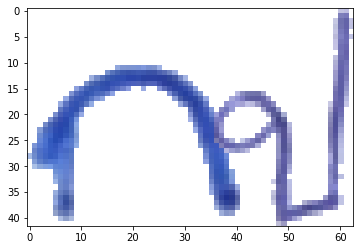

In [23]:
# ทดลอง ลบได้
crop1 = cropIm("C:/Users/HOME/Desktop/Blue/train/001/char_1_set_2 (16).png")
crop2 = cropIm("C:/Users/HOME/Desktop/Blue/train/027/char_27_set_1 (6).png")


img1 = crop1
img2 = crop2

newIm,_,_ = mergeIm2(img1, img2)
newIm = newIm[:,:,::-1]
newIm = Image.fromarray(newIm)
plt.imshow(newIm)
plt.show

In [ ]:
#เพิ่มเติมตัวที่มีมากกว่า 1 ชิ้น

In [68]:
# ตัดขอบแบบตัวแยกกัน ทำสระอะ
def cropIm3(in_path,out_path):
    image = cv2.imread(in_path)
    x,y,_ = image.shape

    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0

    for i in range(x):
        for j in range(y):    
            if 255-image[i][j][0] > 10:
                x1 = i
                break
        if x1 != 0:
            break

    for i in range(x):
        for j in range(y):    
            if 255-image[x-1-i][j][0] > 10:
                x2 = x-1-i
                break
        if x2 != 0:
            break

    for j in range(y):
        for i in range(x):    
            if 255-image[i][j][0] > 10:
                y1 = j
                break
        if y1 != 0:
            break

    for j in range(y):
        for i in range(x):    
            if 255-image[i][y-1-j][0] > 10:
                y2 = y-1-j
                break
        if y2 != 0:
            break

    cropped_image = image[x1:x2,y1:y2]
    
    img = Image.fromarray(cropped_image)
    x,y = img.size

    if x>y :
        border_x = int(x/10)
        border_y = int(((x+2*border_x)-y)/2)
    elif y>x :
        border_y = int(y/10)
        border_x = int(((y+2*border_y)-x)/2)
    else:
        border_x = int(x/10)
        border_y = int(y/10)
     
    border = (border_y, border_x, border_y, border_x)
    #img = Image.fromarray(img)
   
    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill='white')
        
        bimg = bimg.resize((50, 50))
    else:
        raise runtimeerror('border is not an integer or tuple!')
    
    bimg.save(out_path)
    
    image = cv2.imread(out_path)
    x,y,_ = image.shape

    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0
    
    ss = 10
    for i in range(x):
        for j in range(y):    
            if 255-image[i][j][0] > ss:
                x1 = i
                break
        if x1 != 0:
            break

    for i in range(x):
        for j in range(y):    
            if 255-image[x-1-i][j][0] > ss:
                x2 = x-1-i
                break
        if x2 != 0:
            break

    for j in range(y):
        for i in range(x):    
            if 255-image[i][j][0] > ss:
                y1 = j
                break
        if y1 != 0:
            break

    for j in range(y):
        for i in range(x):    
            if 255-image[i][y-1-j][0] > ss:
                y2 = y-1-j
                break
        if y2 != 0:
            break

    cropped_image = image[x1:x2,y1:y2]
    img = Image.fromarray(cropped_image)
    img.save(out_path)
    
    return(cropped_image)
#C:\Users\HOME\Desktop\All\AA